# Implementação do LMS

Esse jupyter tem como objetivo implementar uma classe para fazer o LMS determinístico. A dedução do algoritmo está na aula de regressão. A solução é (não esquecer de colocar o bias nos dados):

w = (MatrizDados.T * MatrizDados)^-1 * MatrizDados * y.T

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randint

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
params = {'figure.figsize': [10, 5], 
          'figure.titlesize': 16,
          'axes.labelsize': 12,
          'axes.titlesize':14, 
          'font.size': 12,
          'legend.fontsize': 12, 
          'xtick.labelsize': 10, 
          'ytick.labelsize': 10
         }
plt.rcParams.update(params)

## Importando um dataset para testar

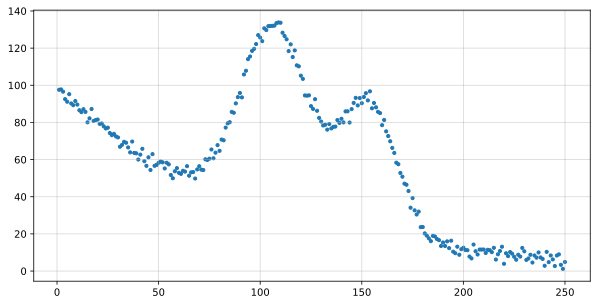

In [2]:
dataframe = pd.read_csv("/home/dimi/Programming/MachineLearningUFABC/Projeto_Perceptron_Adaline/Datasets/dataset_regression.csv", sep=";", header=None, names=["y","x"])

xOriginal = dataframe["x"].to_numpy()
yOriginal = dataframe["y"].to_numpy()

plt.scatter(xOriginal, yOriginal, s=10)
plt.grid(alpha=0.5)
plt.show()

## Definição de Funções 

### Função para adicionar bias aos dados

In [3]:
def adicionarDimensaoBias(vetorDados):
    
    novoX = []
    
    for dadoAtual in vetorDados:
        novoDadoAtual = np.append(1, dadoAtual)
        novoX.append(novoDadoAtual)
        
    return np.array(novoX)

In [4]:
print(xOriginal[10])
xNovo = adicionarDimensaoBias(xOriginal)
print(xNovo[10])

11.0
[ 1. 11.]


### Função para calcular os pesos de cada entrada

In [5]:
def calcularPesos(dados, target):
    return np.matmul(np.matmul(np.linalg.inv(np.matmul(dados.T, dados)), dados.T), target.T)

In [6]:
pesos = calcularPesos(xNovo, yOriginal)
pesos

array([102.79508288,  -0.33675864])

### Função para calcular o erro quadrático

In [7]:
def calcularMSE(dadosComBias, target, pesos):
    
    vetorErros = []
    
    for dadoAtual, targetAtual in zip(dadosComBias, target):
        erroAtual = targetAtual - np.matmul(pesos.T, dadoAtual)
        vetorErros.append(erroAtual)
        
    vetorErros = np.array(vetorErros)
    
    return np.matmul(vetorErros.T, vetorErros)/len(target)

In [8]:
calcularMSE(xNovo, yOriginal, pesos)

829.6354111460035

## Verificando visualmente a solução

In [9]:
eixoXReta = [xOriginal[0], xOriginal[-1]]
eixoYReta = [pesos[0]+xOriginal[0]*pesos[1], pesos[0]+xOriginal[-1]*pesos[1]]

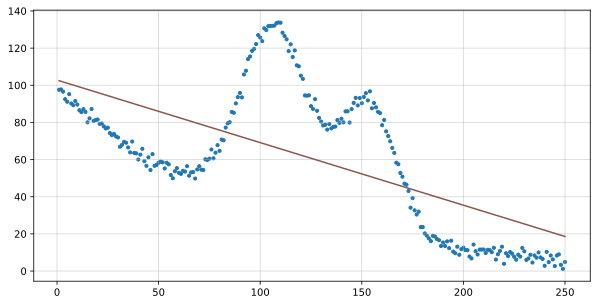

In [10]:
plt.scatter(xOriginal, yOriginal, s=10)
plt.plot(eixoXReta, eixoYReta, color="tab:brown")
plt.grid(alpha=0.5)
plt.show()

## Testando com outros datasets

Erro quadrático: 706836.7020088499
Raiz do erro quadrático: 840.7358098765925


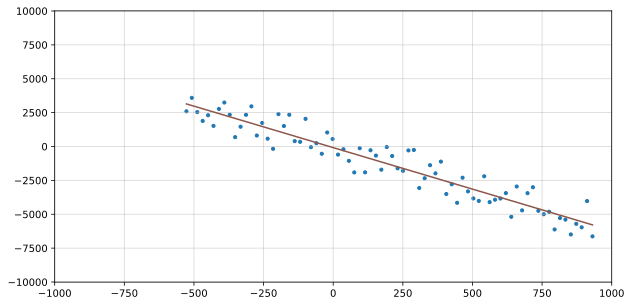

Erro quadrático: 885396.1716526345
Raiz do erro quadrático: 940.9549254096258


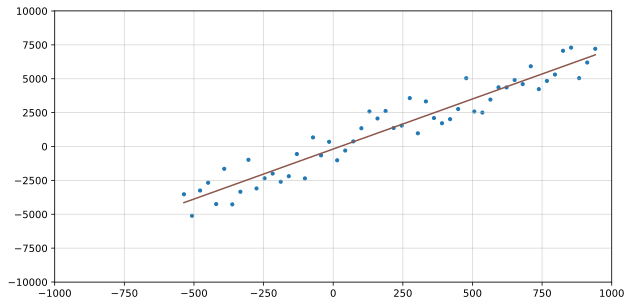

Erro quadrático: 1052190.4514051443
Raiz do erro quadrático: 1025.763350585867


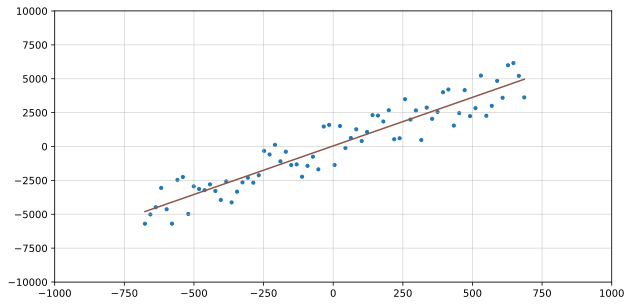

Erro quadrático: 71786.32030391024
Raiz do erro quadrático: 267.9296928373379


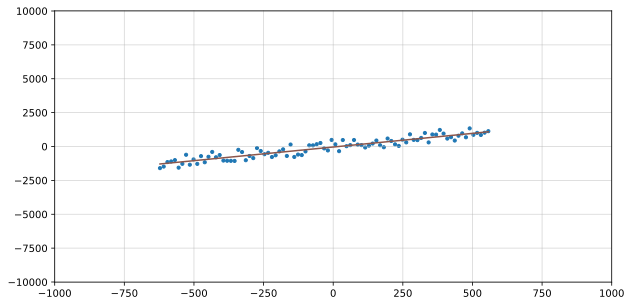

Erro quadrático: 18470.749685984152
Raiz do erro quadrático: 135.90713625849142


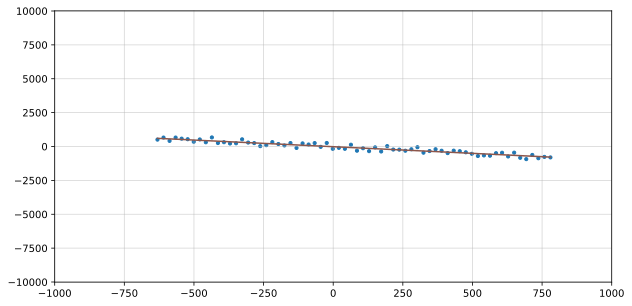

Erro quadrático: 18110.79591050256
Raiz do erro quadrático: 134.57635717503487


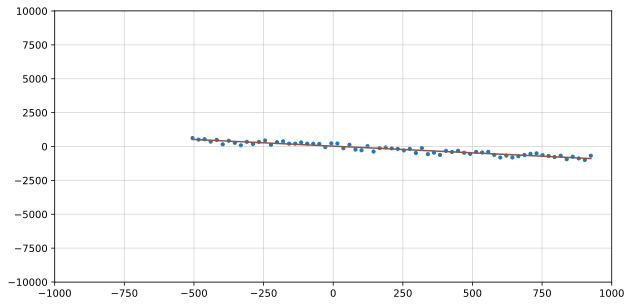

Erro quadrático: 930138.4869977413
Raiz do erro quadrático: 964.436875589969


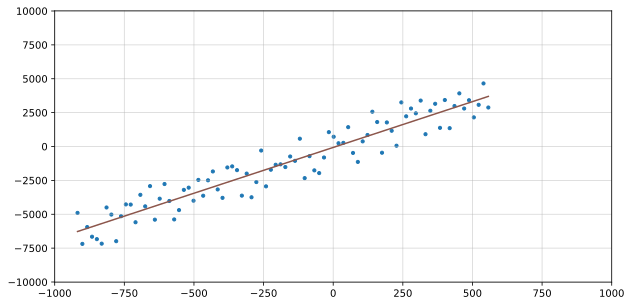

Erro quadrático: 21533.632770120363
Raiz do erro quadrático: 146.74342496384756


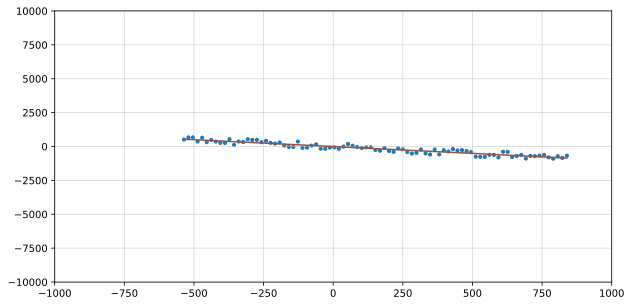

Erro quadrático: 183311.16318929367
Raiz do erro quadrático: 428.148529355519


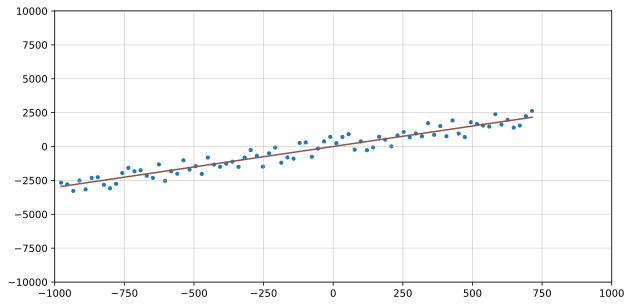

Erro quadrático: 1424057.5606954468
Raiz do erro quadrático: 1193.3388289565737


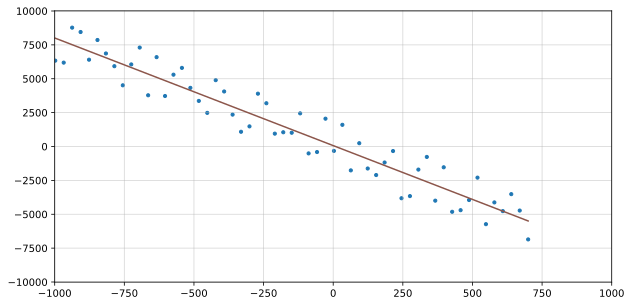

In [11]:
for i in range(10):

    # COEFICIENTES DA RETA ALEATORIOS
    coeficienteAngular = randint(-10,10)
    coeficienteLinear  = randint(-10,10)

    # CRIANDO O DATASET COM QUANTIDADE E RANGE DE PONTOS ALEATORIOS
    a = np.linspace(-randint(500,1000), randint(500,1000), randint(50,100))
    b = []
    for entradaAtual in a:
        b.append(coeficienteAngular*(entradaAtual + randint(-250,250)) + coeficienteLinear)
    b = np.array(b)

    # ADICIONANDO O BIAS E CALCULANDO OS PESOS DO LMS
    aNovo = adicionarDimensaoBias(a)
    pesos = calcularPesos(aNovo, b)

    # CRIANDO A RETA ENCONTRADA PELO LMS
    eixoXReta = [a[0], a[-1]]
    eixoYReta = [pesos[0]+a[0]*pesos[1], pesos[0]+a[-1]*pesos[1]]
    
    # ERRO QUADRÁTICO
    erroQuadraticoMedio = calcularMSE(aNovo, b, pesos)
    print("Erro quadrático:", erroQuadraticoMedio)
    
    # RAIZ DO ERRO QUADRATICO
    print("Raiz do erro quadrático:", erroQuadraticoMedio**(1/2))

    # PLOTANDO
    plt.scatter(a, b, s=10)
    plt.plot(eixoXReta, eixoYReta, color="tab:brown")
    plt.grid(alpha=0.5)
    plt.xlim(-1000, 1000)
    plt.ylim(-10010, 10010)
    plt.show()